<a href="https://colab.research.google.com/github/ReAlex1902/stock-trend-pred/blob/main/modeling_v2_sbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df_scaled.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df_scaled.parquet /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/msft_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/amzn_df.parquet /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/aapl_df.parquet /content

In [ ]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data-amzn.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AMZN-dataset/data_dump_amzn.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data-aapl.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/AAPL-dataset/data_dump_aapl.pickle /content

!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data-msft.csv /content
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/MSFT-dataset/data_dump_msft.pickle /content

In [ ]:
!pip install fastparquet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.0 MB/s eta 0:00:00


## Finance

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
msft_df_scaled = pd.read_parquet('msft_df_scaled.parquet', engine='fastparquet')
amzn_df_scaled = pd.read_parquet('amzn_df_scaled.parquet', engine='fastparquet')
aapl_df_scaled = pd.read_parquet('aapl_df_scaled.parquet', engine='fastparquet')

msft_df_scaled['file-company'] = 'msft'
amzn_df_scaled['file-company'] = 'amzn'
aapl_df_scaled['file-company'] = 'aapl'

msft_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
msft_df_scaled = msft_df_scaled[['file-date', 'file-company'] + [col for col in msft_df_scaled.columns if col not in ['file-date', 'file-company']]]

amzn_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
amzn_df_scaled = amzn_df_scaled[['file-date', 'file-company'] + [col for col in amzn_df_scaled.columns if col not in ['file-date', 'file-company']]]

aapl_df_scaled.rename(columns={'Date': 'file-date'}, inplace=True)
aapl_df_scaled = aapl_df_scaled[['file-date', 'file-company'] + [col for col in aapl_df_scaled.columns if col not in ['file-date', 'file-company']]]

df_finances = pd.concat([msft_df_scaled, amzn_df_scaled, aapl_df_scaled])

del msft_df_scaled, amzn_df_scaled, aapl_df_scaled

df_finances.rename(columns={'file-date': 'date_str', 'file-company': 'ticker'}, inplace=True)

In [ ]:
df_finances = df_finances.rename(columns={'2-week-change': '180-days-change'})
df_finances.iloc[:5, :11]

,date_str,ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits,180-days-change,percent-change
index,,,,,,,,,,,
14,2022-01-24,msft,0.333551,0.345746,0.277082,0.362959,0.942170,0.0,0.0,275.135966,-5.289113
15,2022-01-25,msft,0.330453,0.336007,0.318355,0.327526,0.783569,0.0,0.0,275.073844,-2.724102
16,2022-01-26,msft,0.405473,0.398072,0.353926,0.364488,1.000000,0.0,0.0,274.781054,-5.519689
17,2022-01-27,msft,0.381195,0.392559,0.376102,0.378562,0.545138,0.0,0.0,274.407852,-6.632944
18,2022-01-28,msft,0.370127,0.397980,0.360353,0.416422,0.499124,0.0,0.0,274.102340,-9.284341


## Texts

In [ ]:
company_tickers = ['msft', 'aapl', 'amzn']

df_texts = pd.DataFrame(columns=['file_name', 'date_str', 'text_id', 'title', 'content', 'ticker'])

for company_ticker in company_tickers:

    df = pd.read_csv(f'data-{company_ticker}.csv')
    df_texts = pd.concat([df_texts, df])

df_texts['combined_text'] = df_texts['title'] + '\n' + df_texts['content']

In [ ]:
df = df_texts.merge(df_finances, how = 'inner', on = ['ticker', 'date_str'])
df.sort_values('date_str', inplace = True)
df.dropna(inplace=True)

del df_texts, df_finances
df

,file_name,date_str,text_id,title,content,ticker,combined_text,Open,High,Low,...,Dividends_prev_5d,Dividends_prev_6d,Dividends_prev_7d,Dividends_prev_8d,Dividends_prev_9d,Dividends_prev_10d,Dividends_prev_11d,Dividends_prev_12d,Dividends_prev_13d,Dividends_prev_14d
21326,Amazon Athena is now available in the AWS Asia...,2022-09-01,CBMiZ2h0dHBzOi8vYXdzLmFtYXpvbi5jb20vYWJvdXQtYX...,Amazon Athena is now available in the AWS Asia...,"Posted On: Sep 1, 2022\nAmazon Athena is an in...",amzn,Amazon Athena is now available in the AWS Asia...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21289,'Brazilians aren't familiar with the Amazon': ...,2022-09-01,CBMiYmh0dHBzOi8vbmV3cy5tb25nYWJheS5jb20vMjAyMi...,'Brazilians aren't familiar with the Amazon': ...,- Environmental activist Ângela Mendes coordin...,amzn,'Brazilians aren't familiar with the Amazon': ...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21288,You need to watch the most realistic sci-fi th...,2022-09-01,CBMiWmh0dHBzOi8vd3d3LmludmVyc2UuY29tL2VudGVydG...,You need to watch the most realistic sci-fi th...,You need to watch the most realistic sci-fi th...,amzn,You need to watch the most realistic sci-fi th...,0.411742,0.419042,0.405746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11853,Apple settles lawsuit over its App Store moder...,2022-09-01,CBMiZGh0dHBzOi8vd3d3LnRoZXZlcmdlLmNvbS8yMDIyLz...,Apple settles lawsuit over its App Store moder...,Developer and App Store critic Kosta Eleftheri...,aapl,Apple settles lawsuit over its App Store moder...,0.415371,0.416464,0.409081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11852,Apple settles lawsuit with developer over App ...,2022-09-01,CBMia2h0dHBzOi8vdGVjaGNydW5jaC5jb20vMjAyMi8wOS...,Apple settles lawsuit with developer over App ...,Apple settles lawsuit with developer over App ...,aapl,Apple settles lawsuit with developer over App ...,0.415371,0.416464,0.409081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23278,Amazon annihilates its price in an unprecedent...,2023-09-29,CBMiV2h0dHBzOi8vd3d3LmdlYXJyaWNlLmNvbS91cGRhdG...,Amazon annihilates its price in an unprecedent...,The iPhone 14 is cheaper than ever in a unique...,amzn,Amazon annihilates its price in an unprecedent...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23277,Nooses found at Windsor construction site lead...,2023-09-29,CBMihwFodHRwczovL3d3dy5uYmNjb25uZWN0aWN1dC5jb2...,Nooses found at Windsor construction site lead...,Five Black and Hispanic electricians who felt ...,amzn,Nooses found at Windsor construction site lead...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23276,7 key stats that help explain Amazon's economi...,2023-09-29,CBMifWh0dHBzOi8vd3d3LmFib3V0YW1hem9uLmNvbS9uZX...,7 key stats that help explain Amazon's economi...,"For more than 20 years, I’ve spent my career h...",amzn,7 key stats that help explain Amazon's economi...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23266,Brazil touts climate credentials as Amazon def...,2023-09-29,CBMiaGh0dHBzOi8vd3d3LmNuYmMuY29tLzIwMjMvMDkvMj...,Brazil touts climate credentials as Amazon def...,Brazil touts climate credentials as Amazon def...,amzn,Brazil touts climate credentials as Amazon def...,0.432711,0.429673,0.431303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Text to vector - create

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2", device="cuda")

# Our sentences we like to encode
sentences = [
    "This framework generates embeddings for each input sentence",
    "Sentences are passed as a list of strings.",
    "The quick brown fox jumps over the lazy dog.",
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding.shape)
    print("")

def get_text_vector(texts):
    return model.encode(texts)

In [ ]:
from tqdm import tqdm
from pathlib import Path
import pickle
import os

# Путь к файлу
col = 'title'
# col = 'content'

# file_path = 'sbert-output-all-MiniLM-L6-v2.parquet'
pickle_file = f'{col}_sbert-data-all-MiniLM-L6-v2.pkl'

# df['content'][:5].apply(get_text_vector)

# get_text_vector(df['content'][0])
# df

# Попробуем загрузить существующий файл
try:
    # existing_df = fastparquet.ParquetFile(file_path).to_pandas()
    # existing_df = pd.read_parquet(file_path, engine='fastparquet')
    with open(pickle_file, 'rb') as f:
        existing_data = pickle.load(f)
        existing_df = pd.DataFrame(existing_data)
except FileNotFoundError:
    existing_df = pd.DataFrame(columns = ['file_name', 'date_str', 'ticker'])


# Создаем пустой список для хранения данных
try:
    with open(pickle_file, 'rb') as f:
        data = pickle.load(f)
except FileNotFoundError:
    data = []

# Обрабатываем каждую строку исходного DataFrame
# for index, (row_index, row) in enumerate(df.iterrows()):
for index, row in tqdm(df.iterrows(), total=len(df), desc="Processing rows"):
    if existing_df[
        (existing_df['file_name'] == row['file_name'])
        & (existing_df['date_str'] == row['date_str'])
        & (existing_df['ticker'] == row['ticker'])
    ].shape[0] > 0:
        continue

    # print(index)
    text_vector = get_text_vector(row[col])
    new_row = {
        'file_name': row['file_name'],
        'date_str': row['date_str'],
        'ticker': row['ticker']
    }
    for i in range(384):
        new_row[f'{col}_vector_{i}'] = text_vector[i]
    data.append(new_row)

    # if Path(file_path).exists():
    #     new_df.to_parquet(file_path, engine='fastparquet', append=True)
    # else:
    #     new_df.to_parquet(file_path, engine='fastparquet')

    # with open(pickle_file, 'wb') as f:
    #     pickle.dump(data, f)

    # os.system(f'cp /content/{pickle_file} /content/gdrive/Shareddrives/gdrive/datasets/thesis')

# Создаем новый DataFrame из списка данных
# result_df = pd.DataFrame(data)

In [ ]:
pickle_file = f'{col}_sbert-data-all-MiniLM-L6-v2.pkl'

with open(pickle_file, 'wb') as f:
    pickle.dump(data, f)

os.system(f'cp /content/{pickle_file} /content/gdrive/Shareddrives/gdrive/datasets/thesis')

## Text to vector - load

In [ ]:
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/content_sbert-data-all-MiniLM-L6-v2.pkl /content/
!cp /content/gdrive/Shareddrives/gdrive/datasets/thesis/title_sbert-data-all-MiniLM-L6-v2.pkl /content/

In [ ]:
import pickle

with open('/content/title_sbert-data-all-MiniLM-L6-v2.pkl', 'rb') as f:
    data = pickle.load(f)
    title_vector_df = pd.DataFrame(data)

title_vector_df.head()

,file_name,date_str,ticker,title_vector_0,title_vector_1,title_vector_2,title_vector_3,title_vector_4,title_vector_5,title_vector_6,...,title_vector_374,title_vector_375,title_vector_376,title_vector_377,title_vector_378,title_vector_379,title_vector_380,title_vector_381,title_vector_382,title_vector_383
0,Amazon Athena is now available in the AWS Asia...,2022-09-01,amzn,0.068509,-0.009772,-0.002334,-0.030721,0.021282,-0.007031,-0.082769,...,0.031173,0.025041,-0.026787,-0.061143,0.054979,0.149889,0.091376,-0.008672,-0.031967,0.068303
1,'Brazilians aren't familiar with the Amazon': ...,2022-09-01,amzn,-0.027183,-0.007784,-0.065850,0.005597,-0.030607,0.038106,0.032644,...,-0.005675,-0.060187,0.016359,-0.055878,0.039639,0.072831,0.075260,-0.097495,-0.028746,0.080974
2,You need to watch the most realistic sci-fi th...,2022-09-01,amzn,-0.055348,-0.112653,-0.043876,0.044408,0.024205,-0.047001,-0.076831,...,0.116635,0.026907,0.019466,0.019243,-0.113166,0.055530,0.143048,-0.027494,-0.065802,0.036933
3,Apple settles lawsuit over its App Store moder...,2022-09-01,aapl,-0.001542,0.110108,0.051685,-0.073123,0.021374,-0.039999,0.028892,...,-0.000735,-0.003882,0.001212,-0.037122,-0.037162,-0.003922,0.112518,-0.097991,0.079511,-0.001089
4,Apple settles lawsuit with developer over App ...,2022-09-01,aapl,-0.055383,0.100334,0.075868,-0.049079,0.001149,-0.040359,0.058085,...,0.027130,-0.016632,-0.017872,-0.081936,-0.024020,-0.020513,0.056966,-0.085634,0.078723,0.065681


In [ ]:
import pickle

with open('/content/content_sbert-data-all-MiniLM-L6-v2.pkl', 'rb') as f:
    data = pickle.load(f)
    content_vector_df = pd.DataFrame(data)

content_vector_df.head()

,file_name,date_str,ticker,content_vector_0,content_vector_1,content_vector_2,content_vector_3,content_vector_4,content_vector_5,content_vector_6,...,content_vector_374,content_vector_375,content_vector_376,content_vector_377,content_vector_378,content_vector_379,content_vector_380,content_vector_381,content_vector_382,content_vector_383
0,Amazon Athena is now available in the AWS Asia...,2022-09-01,amzn,0.055126,-0.067173,-0.038121,-0.041723,0.023654,-0.004505,-0.039637,...,0.026777,0.009991,-0.002923,-0.076899,0.062378,0.139449,0.092063,0.013944,-0.051098,0.048000
1,'Brazilians aren't familiar with the Amazon': ...,2022-09-01,amzn,0.017322,-0.011924,-0.032348,-0.014489,0.107320,0.022759,0.061005,...,-0.017336,-0.010605,-0.004351,0.036248,0.007574,0.033128,-0.057801,-0.027574,-0.001256,-0.026029
2,You need to watch the most realistic sci-fi th...,2022-09-01,amzn,0.019280,-0.083441,-0.021105,0.020910,0.074892,0.028351,-0.091436,...,0.122361,0.119236,0.018156,0.001212,-0.051670,0.090254,0.070555,-0.016344,-0.082807,0.057593
3,Apple settles lawsuit over its App Store moder...,2022-09-01,aapl,-0.097424,0.058276,0.057777,-0.073691,0.025042,0.001823,0.081336,...,0.023844,-0.028435,0.025204,-0.079503,-0.000521,-0.021091,0.103622,-0.063401,0.073002,0.063240
4,Apple settles lawsuit with developer over App ...,2022-09-01,aapl,-0.037046,0.061139,0.053615,-0.086364,0.015782,0.013850,0.075622,...,0.020699,-0.022335,0.008803,-0.066335,0.019727,0.007976,0.072639,-0.059582,0.041336,0.068942


In [ ]:
df.shape

(29047, 101)

In [ ]:
df = df.merge(title_vector_df, on=['file_name', 'date_str', 'ticker'], how='inner')
df = df.merge(content_vector_df, on=['file_name', 'date_str', 'ticker'], how='inner')

In [ ]:
df.shape

(29047, 869)

# Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

## Random Forest

In [ ]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
train_size = 0.8
X_train = df.iloc[:int(df.shape[0]*train_size), 17:]
X_test = df.iloc[int(df.shape[0]*train_size):, 17:]
y_train = y_encoded[:int(df.shape[0]*train_size)]
y_test = y_encoded[int(df.shape[0]*train_size):]

# Инициализация RandomForestClassifier
rf_classifier = RandomForestClassifier(
                    n_estimators = 400,
                    criterion = 'entropy',
                    min_samples_split = 23,
                    min_samples_leaf = 21,
                    max_depth = 16,
                    random_state=11,
                    n_jobs = -1,
                    verbose = 10)

# Обучение модели
rf_classifier.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = rf_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод отчета по классификации
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f'Classification Report:\n{class_report}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 400
building tree 2 of 400


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s


building tree 3 of 400
building tree 4 of 400
building tree 5 of 400


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    3.1s


building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s


building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    7.1s


building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    9.9s


building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.0s


building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.8s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.0s


building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   25.3s


building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   29.0s


building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80 of 400
building tree 81 of 400
building tree 82 of 400


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   35.4s


building tree 83 of 400
building tree 84 of 400
building tree 85 of 400
building tree 86 of 400
building tree 87 of 400
building tree 88 of 400
building tree 89 of 400
building tree 90 of 400
building tree 91 of 400
building tree 92 of 400
building tree 93 of 400
building tree 94 of 400
building tree 95 of 400
building tree 96 of 400


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   40.6s


building tree 97 of 400
building tree 98 of 400
building tree 99 of 400
building tree 100 of 400
building tree 101 of 400
building tree 102 of 400
building tree 103 of 400
building tree 104 of 400
building tree 105 of 400
building tree 106 of 400
building tree 107 of 400
building tree 108 of 400
building tree 109 of 400
building tree 110 of 400


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   46.1s


building tree 111 of 400
building tree 112 of 400
building tree 113 of 400
building tree 114 of 400
building tree 115 of 400
building tree 116 of 400
building tree 117 of 400
building tree 118 of 400
building tree 119 of 400
building tree 120 of 400
building tree 121 of 400
building tree 122 of 400
building tree 123 of 400
building tree 124 of 400
building tree 125 of 400


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   53.8s


building tree 126 of 400
building tree 127 of 400
building tree 128 of 400
building tree 129 of 400
building tree 130 of 400
building tree 131 of 400
building tree 132 of 400
building tree 133 of 400
building tree 134 of 400
building tree 135 of 400
building tree 136 of 400
building tree 137 of 400
building tree 138 of 400
building tree 139 of 400
building tree 140 of 400
building tree 141 of 400
building tree 142 of 400


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.0min


building tree 143 of 400
building tree 144 of 400
building tree 145 of 400
building tree 146 of 400
building tree 147 of 400
building tree 148 of 400
building tree 149 of 400
building tree 150 of 400
building tree 151 of 400
building tree 152 of 400
building tree 153 of 400
building tree 154 of 400
building tree 155 of 400
building tree 156 of 400
building tree 157 of 400
building tree 158 of 400
building tree 159 of 400


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min


building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.3min


building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min


building tree 199 of 400
building tree 200 of 400
building tree 201 of 400
building tree 202 of 400
building tree 203 of 400
building tree 204 of 400
building tree 205 of 400
building tree 206 of 400
building tree 207 of 400
building tree 208 of 400
building tree 209 of 400
building tree 210 of 400
building tree 211 of 400
building tree 212 of 400
building tree 213 of 400
building tree 214 of 400
building tree 215 of 400
building tree 216 of 400
building tree 217 of 400
building tree 218 of 400


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.5min


building tree 219 of 400
building tree 220 of 400
building tree 221 of 400
building tree 222 of 400
building tree 223 of 400
building tree 224 of 400
building tree 225 of 400
building tree 226 of 400
building tree 227 of 400
building tree 228 of 400
building tree 229 of 400
building tree 230 of 400
building tree 231 of 400
building tree 232 of 400
building tree 233 of 400
building tree 234 of 400
building tree 235 of 400
building tree 236 of 400
building tree 237 of 400
building tree 238 of 400
building tree 239 of 400


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.7min


building tree 240 of 400
building tree 241 of 400
building tree 242 of 400
building tree 243 of 400
building tree 244 of 400
building tree 245 of 400
building tree 246 of 400
building tree 247 of 400
building tree 248 of 400
building tree 249 of 400
building tree 250 of 400
building tree 251 of 400
building tree 252 of 400
building tree 253 of 400
building tree 254 of 400
building tree 255 of 400
building tree 256 of 400
building tree 257 of 400
building tree 258 of 400
building tree 259 of 400
building tree 260 of 400
building tree 261 of 400
building tree 262 of 400
building tree 263 of 400


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.9min


building tree 264 of 400
building tree 265 of 400
building tree 266 of 400
building tree 267 of 400
building tree 268 of 400
building tree 269 of 400
building tree 270 of 400
building tree 271 of 400
building tree 272 of 400
building tree 273 of 400
building tree 274 of 400
building tree 275 of 400
building tree 276 of 400
building tree 277 of 400
building tree 278 of 400
building tree 279 of 400
building tree 280 of 400
building tree 281 of 400
building tree 282 of 400
building tree 283 of 400
building tree 284 of 400
building tree 285 of 400
building tree 286 of 400


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.1min


building tree 287 of 400
building tree 288 of 400
building tree 289 of 400
building tree 290 of 400
building tree 291 of 400
building tree 292 of 400
building tree 293 of 400
building tree 294 of 400
building tree 295 of 400
building tree 296 of 400
building tree 297 of 400
building tree 298 of 400
building tree 299 of 400
building tree 300 of 400
building tree 301 of 400
building tree 302 of 400
building tree 303 of 400
building tree 304 of 400
building tree 305 of 400
building tree 306 of 400
building tree 307 of 400
building tree 308 of 400
building tree 309 of 400
building tree 310 of 400
building tree 311 of 400


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.2min


building tree 312 of 400
building tree 313 of 400
building tree 314 of 400
building tree 315 of 400
building tree 316 of 400
building tree 317 of 400
building tree 318 of 400
building tree 319 of 400
building tree 320 of 400
building tree 321 of 400
building tree 322 of 400
building tree 323 of 400
building tree 324 of 400
building tree 325 of 400
building tree 326 of 400
building tree 327 of 400
building tree 328 of 400
building tree 329 of 400
building tree 330 of 400
building tree 331 of 400
building tree 332 of 400
building tree 333 of 400
building tree 334 of 400
building tree 335 of 400


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.4min


building tree 336 of 400
building tree 337 of 400
building tree 338 of 400
building tree 339 of 400
building tree 340 of 400
building tree 341 of 400
building tree 342 of 400
building tree 343 of 400
building tree 344 of 400
building tree 345 of 400
building tree 346 of 400
building tree 347 of 400
building tree 348 of 400
building tree 349 of 400
building tree 350 of 400
building tree 351 of 400
building tree 352 of 400
building tree 353 of 400
building tree 354 of 400
building tree 355 of 400
building tree 356 of 400
building tree 357 of 400
building tree 358 of 400
building tree 359 of 400
building tree 360 of 400
building tree 361 of 400
building tree 362 of 400
building tree 363 of 400


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.6min


building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.8min


building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

  -1% to +1%       0.13      0.17      0.15       332
         1%+       0.95      0.71      0.81      5077
        <-1%       0.21      0.81      0.33       401

    accuracy                           0.69      5810
   macro avg       0.43      0.56      0.43      5810
weighted avg       0.85      0.69      0.74      5810



[Parallel(n_jobs=2)]: Done 388 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 400 out of 400 | elapsed:    0.2s finished


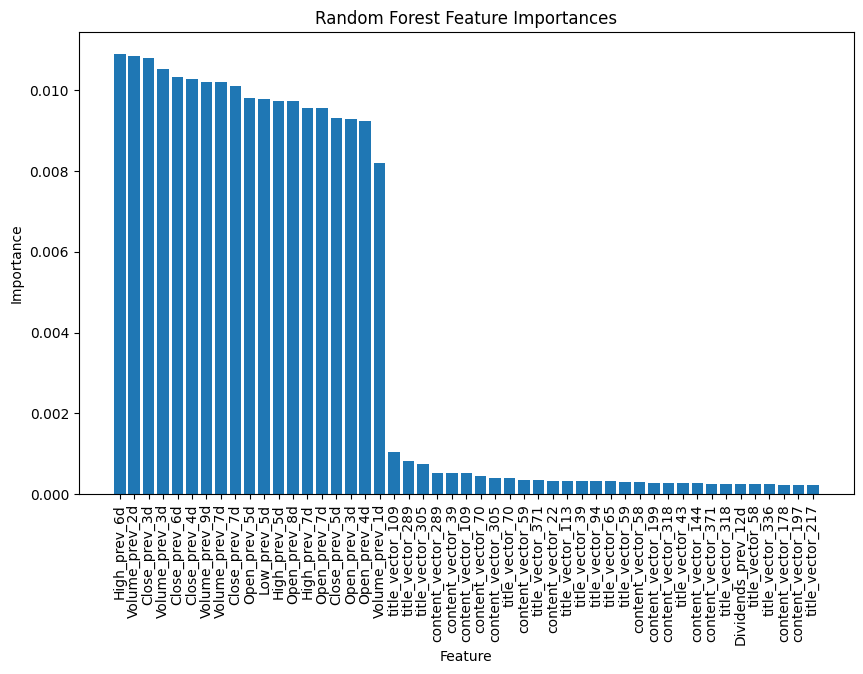

In [ ]:
import matplotlib.pyplot as plt

# Assuming rf_classifier is your trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

# Get the names of the features
feature_names = X_train.columns  # Assuming df is your DataFrame with features

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][51:100]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

## Logistic Regression

In [ ]:
train_size = 0.8
X_train = df.iloc[:int(df.shape[0]*train_size), 17:]
X_test = df.iloc[int(df.shape[0]*train_size):, 17:]
y_train = y_encoded[:int(df.shape[0]*train_size)]
y_test = y_encoded[int(df.shape[0]*train_size):]

# Инициализация LogisticRegression
lr_classifier = LogisticRegression(max_iter=1000, random_state=11, verbose=10)

# Обучение модели
lr_classifier.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred_lr = lr_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод отчета по классификации
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.69
Classification Report:
              precision    recall  f1-score   support

  -1% to +1%       0.13      0.17      0.15       332
         1%+       0.95      0.71      0.81      5077
        <-1%       0.21      0.81      0.33       401

    accuracy                           0.69      5810
   macro avg       0.43      0.56      0.43      5810
weighted avg       0.85      0.69      0.74      5810



[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.7min
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:  1.7min


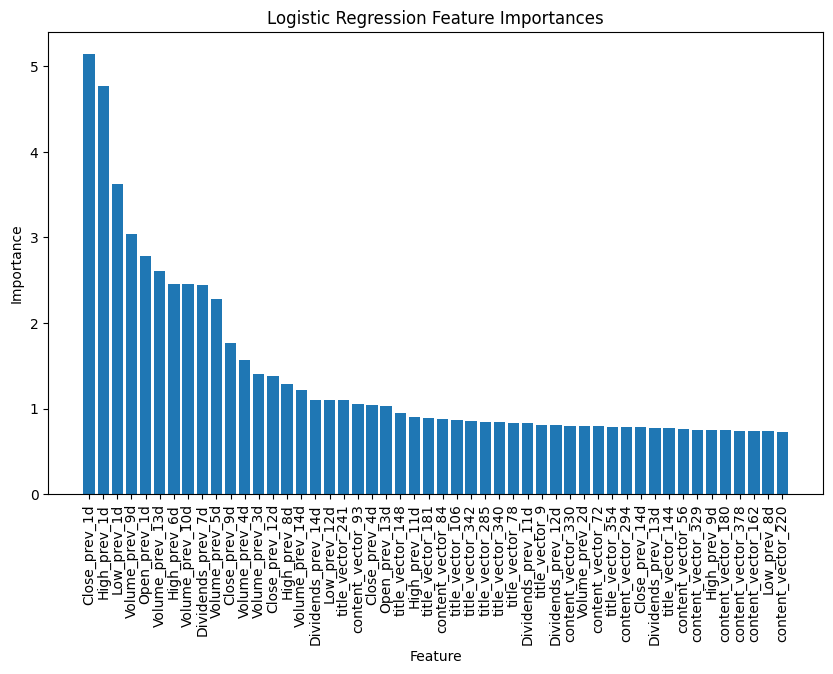

In [ ]:
import matplotlib.pyplot as plt

# Assuming lr_classifier is your trained Logistic Regression classifier
feature_importances = lr_classifier.coef_[0]

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Logistic Regression Feature Importances')
plt.show()

## Catboost classifier

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 13.0 MB/s eta 0:00:00


In [ ]:
y = df['change-category']

# Преобразование текстовых значений в числовые для целевой переменной
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Разделение данных на тренировочный и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=11)

train_size = 0.8
X_train = df.iloc[:int(df.shape[0]*train_size), 17:]
X_test = df.iloc[int(df.shape[0]*train_size):, 17:]
y_train = y_encoded[:int(df.shape[0]*train_size)]
y_test = y_encoded[int(df.shape[0]*train_size):]


from catboost import CatBoostClassifier

# Инициализация CatBoostClassifier
cb_classifier = CatBoostClassifier(
                    iterations=100,
                    use_best_model = False,
                    depth=3,
                    learning_rate=0.007,
                    loss_function='MultiClass',
                    eval_metric='Accuracy',
                    random_seed=11,
                    colsample_bylevel = int(np.sqrt(X_train.shape[1])) / X_train.shape[1],
                    verbose=10)

# Обучение модели
cb_classifier.fit(X_train, y_train, eval_set=(X_test, y_test))

# Предсказание на тестовом наборе
y_pred = cb_classifier.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Вывод отчета по классификации
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(f'Classification Report:\n{class_report}')

0:	learn: 0.8061282	test: 0.8738382	best: 0.8738382 (0)	total: 99.8ms	remaining: 9.88s
10:	learn: 0.8245040	test: 0.8564544	best: 0.8975904 (2)	total: 713ms	remaining: 5.77s
20:	learn: 0.8245040	test: 0.8578313	best: 0.8975904 (2)	total: 1.33s	remaining: 4.99s
30:	learn: 0.8245040	test: 0.8657487	best: 0.8975904 (2)	total: 2.05s	remaining: 4.57s
40:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 2.75s	remaining: 3.95s
50:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 3.24s	remaining: 3.11s
60:	learn: 0.8245040	test: 0.8358003	best: 0.8975904 (2)	total: 3.64s	remaining: 2.33s
70:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 4.04s	remaining: 1.65s
80:	learn: 0.8245040	test: 0.8363167	best: 0.8975904 (2)	total: 4.43s	remaining: 1.04s
90:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 4.88s	remaining: 483ms
99:	learn: 0.8245040	test: 0.8364888	best: 0.8975904 (2)	total: 5.2s	remaining: 0us

bestTest = 0.8975903614
bestIteration = 2

Ac

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


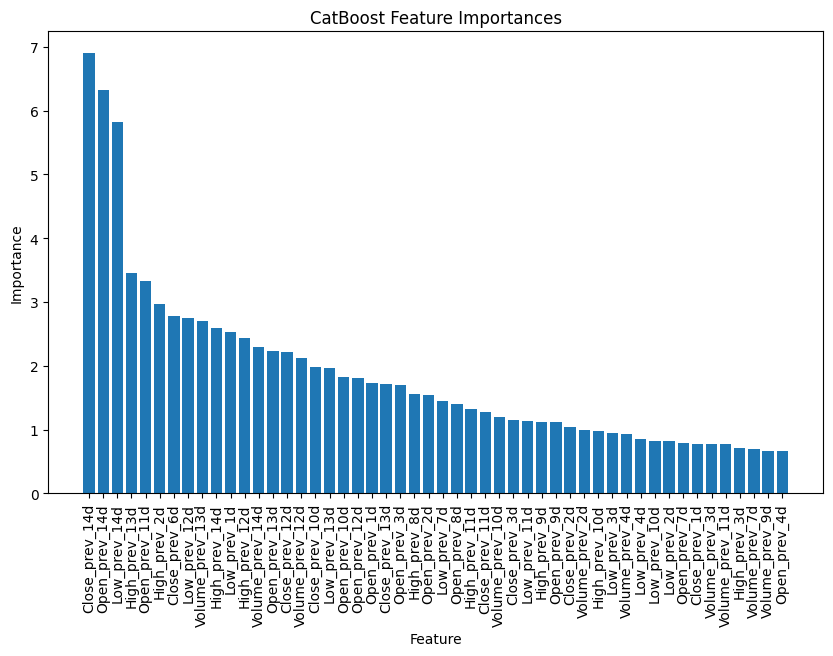

In [ ]:
import matplotlib.pyplot as plt

# Assuming cb_classifier is your trained CatBoost classifier
feature_importances = cb_classifier.get_feature_importance()

# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is your training data

# Sort the features by their importances
sorted_indices = feature_importances.argsort()[::-1][:50]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('CatBoost Feature Importances')
plt.show()

In [ ]:
## add MLP with sbert
## add metrics for MLP